In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
#import tensorflow as tf
#from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data_sets/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('data_sets/test.csv')
ori_test_df = test_df.copy()  # copying original test set for later usage
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_df.shape

(418, 11)

It can be seen that the test data does not have the **ground truth** values

In [5]:
# encode the categorical column to numerical values with dictionary (Important piece of code) : NOT AN ESSENTIAL CODE HERE 
# transform_dic = {'Sex': {"female":0, "male":1},
#                'Embarked' : {'C':0, 'Q':1, 'S':2}}
# tran_df = df.replace(transform_dic)
# tran_df.head()

## Checking Null values

In [6]:
# Null values contained in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

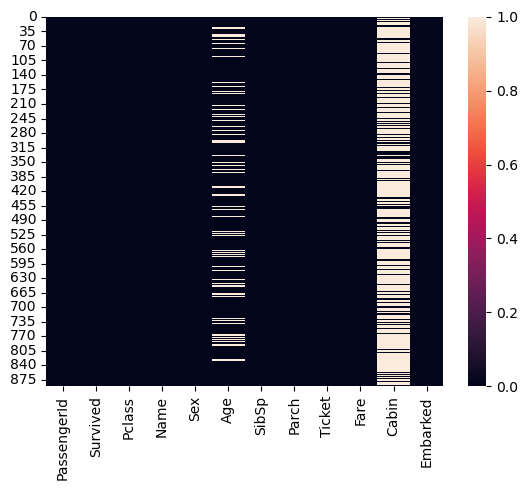

In [7]:
# Null values in a graphical format
sns.heatmap(df.isnull())

There are some null values in the column **Age** and **Cabin**. But since both the variables are not significant for our model we'll drop those columns

In [8]:
df = df.drop(['Age','Cabin','Name','Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S


## Dummying all categorical variables

In [9]:
df = pd.get_dummies(df, columns=['Sex'])
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,0,1,0,0,1
1,2,1,1,1,0,71.2833,1,0,1,0,0
2,3,1,3,0,0,7.9250,1,0,0,0,1
3,4,1,1,1,0,53.1000,1,0,0,0,1
4,5,0,3,0,0,8.0500,0,1,0,0,1


## Applying Logistic Regression

In [10]:
# Labels of the data set
y = pd.DataFrame(df['Survived'])

# establish the data, X dropping labels and PassengerId
X = df.drop(columns = ['PassengerId','Survived'])
X

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,0,0
2,3,0,0,7.9250,1,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1
4,3,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,0,1,0,0,1
887,1,0,0,30.0000,1,0,0,0,1
888,3,1,2,23.4500,1,0,0,0,1
889,1,0,0,30.0000,0,1,1,0,0


In [11]:
# Train and test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 21)

In [12]:
print(len(X_train.index))
print(len(X_test.index))
print(len(y_train.index))
print(len(y_test.index))
print(y_test)

596
295
596
295
     Survived
617         0
379         0
725         0
826         0
450         0
..        ...
276         0
83          0
132         0
208         1
877         0

[295 rows x 1 columns]


## Scaling the training data

Now since it is visible that data in **X** has values in different numerical scales, to get everything best usable with the model, it is essential to scale the data with a suitable scalar for this we use **StandardScalar** from Scikit-Learn.

In [13]:
scal = StandardScaler()
X_train_scaled = scal.fit_transform(X_train)
X_test_scaled = scal.transform(X_test)
y_train_reshaped = y_train.values.ravel() #added this line because when I run it I get an error: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

In [14]:
# Create and train the LogisticRegression model
model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train_reshaped)

LogisticRegression(random_state=0)

## Predictions

In [15]:
predictions = model.predict(X_test_scaled)
predictions

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

## Accuracy of the model
Sklearn's model.score(X,y) calculation is based on co-efficient of determination i.e R^2 that takes model.score= (X_test,y_test). The y_predicted need not be supplied externally, rather it calculates y_predicted internally and uses it in the calculations.

This is how scikit-learn calculates: **model.score(X_test,y_test)**

**u = ((y_test - y_predicted) ** 2).sum()**

**v = ((y_test - y_test.mean()) ** 2).sum()**

**score = 1 - (u/v)**

This is y_test:

In [16]:
# How acurate the predicted outputs from LR
model.score(X_test_scaled, y_test)

0.7966101694915254

This implies that **79.66%** times the model can predict the correct output. To increase the accuracy more we are going to do the logistic regression with some added regularization so the extreme values are peanalized.

In [17]:
log_reg_1 = LogisticRegression( random_state = 0,
                              C = 0.5,  # regularization parameter
                               fit_intercept = True,
                              ).fit(X_train_scaled, y_train_reshaped)

In [18]:
# Evaluate the accuracy of the model
log_reg_1.score(X_test_scaled, y_test)

0.7966101694915254

This indicates that for this data set by changing the regularization parameter does not increase the accuracy

### confusion matrix

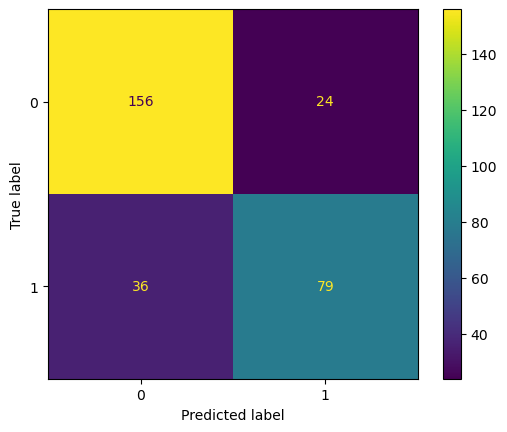

In [19]:
cm = confusion_matrix(y_test, predictions, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Looking at the accuracy and confusion matrix it can be seen that the model **does not perform well** so selecting another classification algorithm is preffered.

# Prediction on the given test data set (test.csv)

<Axes: >

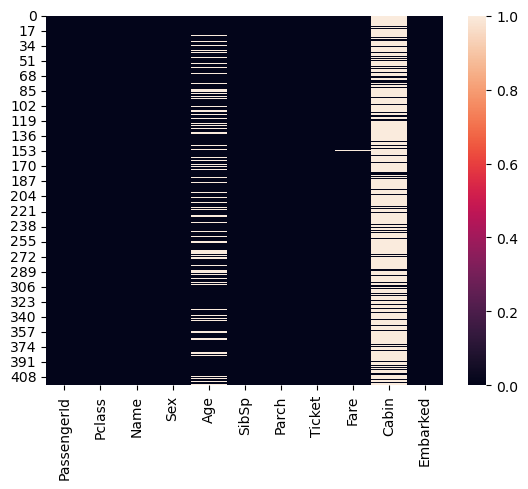

In [20]:
# Null values in a graphical format
sns.heatmap(test_df.isnull())

In [21]:
# drop the columns 'Name', 'Age', 'Cabin' & 'Ticket'
test_df = test_df.drop(columns = ['Name', 'Age', 'Cabin', 'Ticket'], axis =1)
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,892,3,male,0,0,7.8292,Q
1,893,3,female,1,0,7.0000,S
2,894,2,male,0,0,9.6875,Q
3,895,3,male,0,0,8.6625,S
4,896,3,female,1,1,12.2875,S


<Axes: >

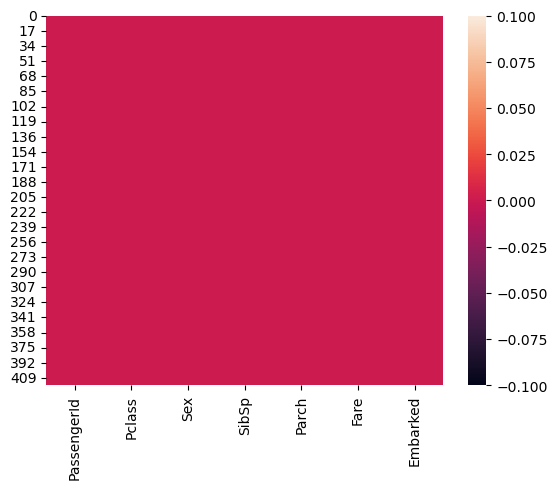

In [22]:
# drop the rowa which consist od null values
test_df = test_df.dropna(subset=['Fare'])  # since it is visible above that there is a null value in 'Fare'

sns.heatmap(test_df.isnull())

In [23]:
## Dumyying variables
test_df = pd.get_dummies(test_df, columns=['Sex'])
test_df = pd.get_dummies(test_df, columns=['Embarked'])
test_df.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,0,7.8292,0,1,0,1,0
1,893,3,1,0,7.0000,1,0,0,0,1
2,894,2,0,0,9.6875,0,1,0,1,0
3,895,3,0,0,8.6625,0,1,0,0,1
4,896,3,1,1,12.2875,1,0,0,0,1


In [24]:
## Scaling test data
X_test_df = test_df.drop(columns = ['PassengerId'])
X_test_df_scaled = scal.fit_transform(X_test_df)
X_test_df_scaled

array([[ 0.87532977, -0.50021819, -0.40080432, ..., -0.56904264,
         2.83993264, -1.34817194],
       [ 0.87532977,  0.61524163, -0.40080432, ..., -0.56904264,
        -0.35212103,  0.74174515],
       [-0.31363607, -0.50021819, -0.40080432, ..., -0.56904264,
         2.83993264, -1.34817194],
       ...,
       [ 0.87532977, -0.50021819, -0.40080432, ..., -0.56904264,
        -0.35212103,  0.74174515],
       [ 0.87532977, -0.50021819, -0.40080432, ..., -0.56904264,
        -0.35212103,  0.74174515],
       [ 0.87532977,  0.61524163,  0.61831399, ...,  1.75733756,
        -0.35212103, -1.34817194]])

In [25]:
## Doing the predictions
test_pred = model.predict(X_test_df_scaled)
test_pred.shape

(417,)

In [26]:
# Saving the total data set with predictions to a .csv file
ori_test_df = ori_test_df.dropna(subset=['Fare'])
print(ori_test_df.shape)

(417, 11)


In [27]:
ori_test_df["Prediction_survived"] = test_pred
ori_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction_survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [28]:
# write the predictions to a .csv file
ori_test_df.to_csv('Log_reg_with_correct_predictions.csv')

# Exploring the predictions 

With the final predictions above, lets see what the accuracy is, and consider how it could be improved in the future. 

For the analysis the datasets are: 

**predictions_df** = the csv of predictions from the ml model running

**test_df** = details of passengers WITHOUT ground truth

**train_df** = the training dataset with the ground truth, as adjusted for the model (dummied, only variables we care about)


Above we can see the information that the datasets provide us, so we can check the following to analyse our model, see where it can be improved, and also compare the model output to our exploratory analysis to ese how it holds up. 

What can we check? (Using these as guides: [Model Validation](https://www.kaggle.com/code/dansbecker/model-validation) and [Confusion Matrix Metrics](https://www.w3schools.com/python/python_ml_confusion_matrix.asp)

1. Model Accuracy
2. Model Precision
3. Model Sensitivity
4. Model Specificity
5. F-score

Not all these scores are super important given the context of the project - being accurate matters only, and false negative and false positive here have the same stakes, so precision (where false positive is a higher concern) and sensitivity/recall (where false negative is more important) are not a huge concern here. 
The F1 score here is more useful as it combines these two metrics for when precision and recall are of equal importance. 

How can we visualise it? 

1. Confusion matrix
2. ROC Curve and AUC



In [29]:
print(len(predictions))

295


In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
confusion_matrix

array([[156,  24],
       [ 36,  79]], dtype=int64)

In [48]:
actuals = y_test #295
training_values=  X_test_scaled
len(training_values) #295

295

In [58]:
confusion_matrix = metrics.confusion_matrix(actuals, predictions)
confusion_matrix
#running this to make sure everything is renamed correctly, to make it easier for readaibility

array([[156,  24],
       [ 36,  79]], dtype=int64)

In [59]:
model_1 = (actuals, predictions)

In [60]:
def get_accuracy_scores(model_name):
    model_accuracy = metrics.accuracy_score(actuals, predictions)
    model_precision = metrics.precision_score(actuals, predictions)
    model_sensitivity = metrics.recall_score(actuals, predictions)
    model_specificity = metrics.recall_score(actuals, predictions, pos_label=0)
    F1_score = metrics.f1_score(actuals, predictions)
    print(f'Accuracy: {model_accuracy},\n'
          f'Precision: {model_precision},\n'
          f'Sensitivity: {model_sensitivity},\n' 
          f'Specificity: {model_specificity},\n' 
          f'F1_score: {F1_score}')
            

In [61]:
get_accuracy_scores(model_1)

Accuracy: 0.7966101694915254,
Precision: 0.7669902912621359,
Sensitivity: 0.6869565217391305,
Specificity: 0.8666666666666667,
F1_score: 0.7247706422018347


What do the above scores mean? 

F score looks at precision and sensitivity. This is useful when a false negative has the same stakes as a false positive, which in this case it does (as a false is a false and is not accurate).

Out of interest, lets see what sklearn says about it.

In [62]:
#Here I am renaming the variables X_train and y_train to fit with what most documentation shows
# and  also to avoid mistakes, and the current names are a little longer!
#They can then be put into functions and graphed more easily and reused for other model iterations.

X_train = X_train_scaled 
y_train =  y_train_reshaped
X_test = X_test_scaled
y_test = y_test 

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

596
596
295
295


In [63]:
len(X_test_scaled)

295

In [64]:
from sklearn.dummy import DummyClassifier

# create a function to test out getting all the strategies at once

def provide_classifiers(strategies):
    for strategy in strategies:
        dummy_clf = DummyClassifier(strategy=strategy)
        dummy_clf.fit(X_train, y_train)
        DummyClassifier(strategy=strategy)
        dummy_clf.predict(X_train)
        classifier_score = dummy_clf.score(X_train, y_train)
        print(f'Strategy: {strategy} , Score: {classifier_score}')

#strategy{“most_frequent”, “prior”, “stratified”, “uniform”, “constant”} [from here](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
Constant doesn't work though because it needs another parameter, so leave that one for now. 


In [65]:
strategies = ["most_frequent", "prior", "stratified", "uniform"]
provide_classifiers(strategies)

Strategy: most_frequent , Score: 0.6191275167785235
Strategy: prior , Score: 0.6191275167785235
Strategy: stratified , Score: 0.511744966442953
Strategy: uniform , Score: 0.5


## AUC ROC

The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes. So it must be higher than 0.5 (blue line in the chart below). The closer to 1 (everything correct) the better.  [Information about AUC from here - "Understanding the AUC-ROC Curve in Python".](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#How_Does_the_AUC-ROC_Curve_Work?) - Really very useful! 

In [39]:
#This was already done in cell 14. Leaving it here as a note to see info before making curve.

# Create and train the LogisticRegression model
#model = LogisticRegression(random_state=0)
#model.fit(X_train_scaled, y_train_reshaped)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

#model already defined in cell 14 above
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model already done in cell 14 as well
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [66]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [67]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [68]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8532608695652173 0.8476811594202899


In [ ]:
# These were the answers from when I somehow managed to do it - the graph also worked, so not sure what happened!

#0.8324439191528479 0.9002125043276864

# These are the ones I have done that I think are actually correct!
#0.8532608695652173 0.8476811594202899

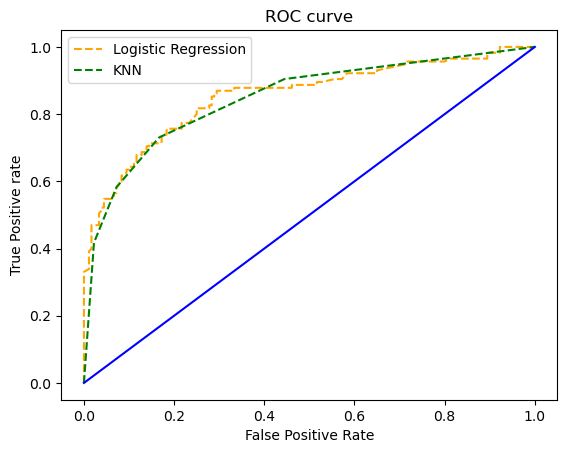

In [69]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();